# Decision Trees and Random Forest Project

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

## Get the Data

In [2]:
loans = pd.read_csv('loan_data.csv')
loans.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


# Exploratory Data Analysis

Let's do some data visualization! We'll use seaborn and pandas built-in plotting capabilities

** Creating a histogram of two FICO distributions on top of each other, one for each credit.policy outcome.**

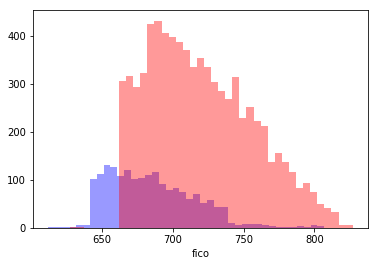

In [3]:
sns.distplot(loans[loans['credit.policy'] == False]['fico'], kde=False, color='blue',bins=40)
sns.distplot(loans[loans['credit.policy'] == True]['fico'],kde=False, color='red',bins=40)

** Creating a similar figure, except this time select by the not.fully.paid column.**

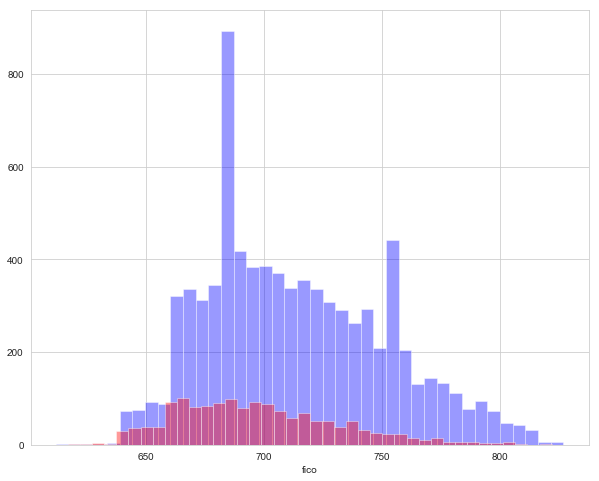

In [4]:
sns.set_style('whitegrid')
plt.figure(figsize=(10,8))
sns.distplot(loans[loans['not.fully.paid'] == False]['fico'], kde=False, color='blue',bins=40)
sns.distplot(loans[loans['not.fully.paid'] == True]['fico'],kde=False, color='red',bins=40)

** Countplot using seaborn showing the counts of loans by purpose, with the color hue defined by not.fully.paid. **

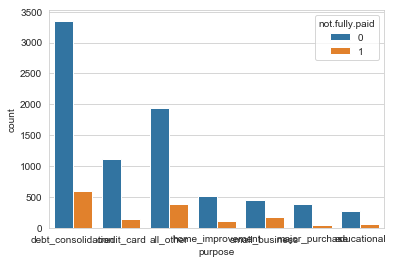

In [5]:
sns.countplot(loans['purpose'], hue='not.fully.paid', data = loans)

** Trend between FICO score and interest rate. **

C:\Users\ravic\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


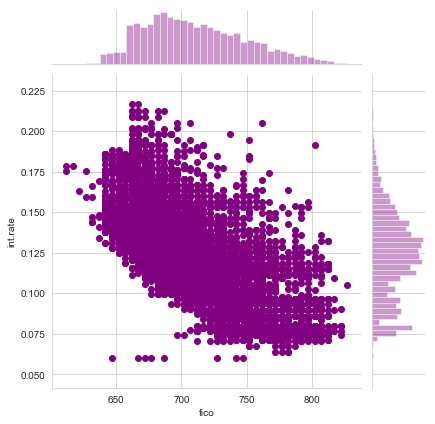

In [6]:
sns.jointplot(x='fico',y='int.rate',data=loans,color='purple')

** lmplots to see if the trend differed between not.fully.paid and credit.policy.**

C:\Users\ravic\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


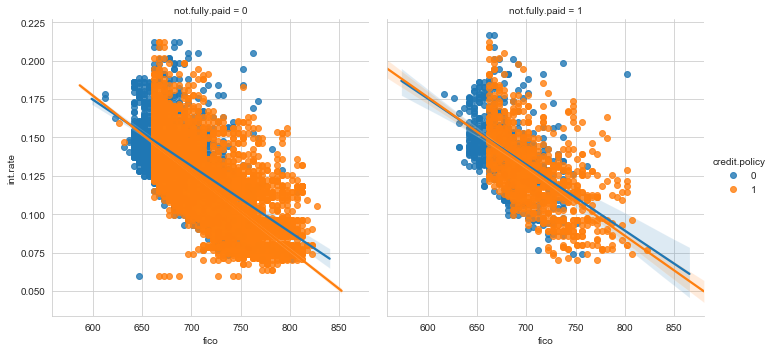

In [7]:
sns.lmplot('fico','int.rate',data=loans,col='not.fully.paid',hue='credit.policy')

# Setting up the Data

## Categorical Features

Notice that the **purpose** column as categorical

Transforming them using dummy variables so sklearn will be able to understand them. 

In [8]:
cat_feats = ['purpose']
final_data = pd.get_dummies(loans,columns=cat_feats,drop_first=True)

In [9]:
final_data.head()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,0,1,0,0,0,0
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,1,0,0,0,0,0
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,0,1,0,0,0,0
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,0,1,0,0,0,0
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,1,0,0,0,0,0


## Train Test Split

Now its time to split our data into a training set and a testing set!

In [10]:
from sklearn.model_selection import train_test_split
x=final_data.drop('not.fully.paid',axis=1)
y=final_data['not.fully.paid']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=101)

## Training a Decision Tree Model

Let's start by training a single decision tree first!

In [11]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)
prediction = dt.predict(x_test)


## Predictions and Evaluation of Decision Tree

In [12]:
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,prediction))
print(classification_report(y_test,prediction))

[[2006  425]
 [ 338  105]]
              precision    recall  f1-score   support

           0       0.86      0.83      0.84      2431
           1       0.20      0.24      0.22       443

   micro avg       0.73      0.73      0.73      2874
   macro avg       0.53      0.53      0.53      2874
weighted avg       0.75      0.73      0.74      2874



## Training the Random Forest model

In [13]:
from sklearn.ensemble import RandomForestClassifier
rfc =RandomForestClassifier(n_estimators=1000)
rfc.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

## Predictions and Evaluation

Let's predict off the y_test values and evaluate our model.

In [14]:
pred1 = rfc.predict(x_test)
print(confusion_matrix(y_test,pred1))
print(classification_report(y_test,pred1))


[[2424    7]
 [ 436    7]]
              precision    recall  f1-score   support

           0       0.85      1.00      0.92      2431
           1       0.50      0.02      0.03       443

   micro avg       0.85      0.85      0.85      2874
   macro avg       0.67      0.51      0.47      2874
weighted avg       0.79      0.85      0.78      2874

